In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("credit_scoring_eng.csv")
df.head()


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding


In [9]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [10]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [11]:
df['days_employed'] = df['days_employed'].fillna(df['days_employed'].median())
df['total_income'] = df['total_income'].fillna(df['total_income'].median())


In [12]:
df.describe()
df['education'].value_counts()
df['income_type'].value_counts()
df['purpose'].value_counts()


purpose
wedding ceremony                                 797
having a wedding                                 777
to have a wedding                                774
real estate transactions                         676
buy commercial real estate                       664
housing transactions                             653
buying property for renting out                  653
transactions with the residential real estate    651
housing                                          647
purchase of the house                            647
purchase of the house for my family              641
construction of own property                     635
property                                         634
transactions with my real estate                 630
building a real estate                           626
buy real estate                                  624
building a property                              620
purchase of my own house                         620
property renovation                   

In [13]:
df.groupby('debt')[['total_income', 'children', 'days_employed']].mean()

pd.crosstab(df['education'], df['debt'])
pd.crosstab(df['family_status'], df['debt'])
pd.crosstab(df['income_type'], df['debt'])


debt,0,1
income_type,,
civil servant,1373,86
employee,10058,1061
entrepreneur,2,0
partner,4709,376
paternity / maternity leave,0,1
retiree,3640,216
student,1,0
unempoyed,1,1


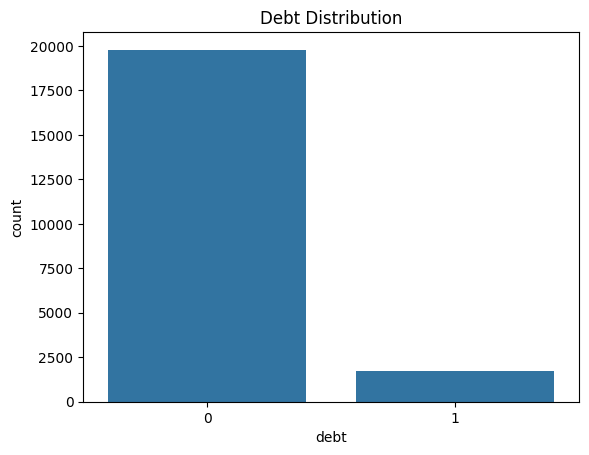

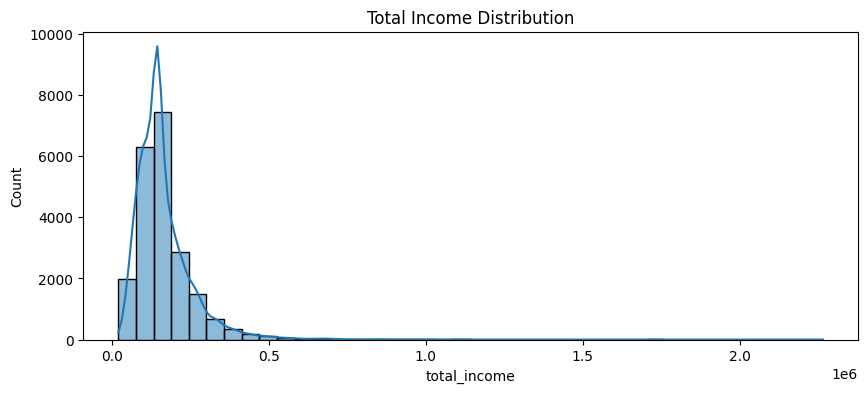

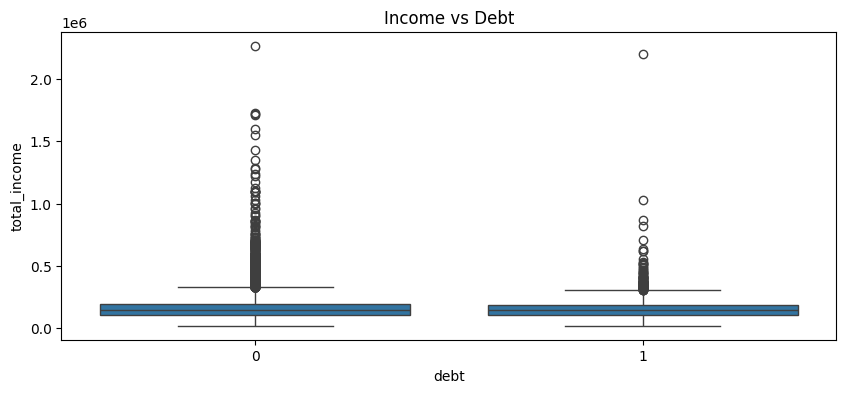

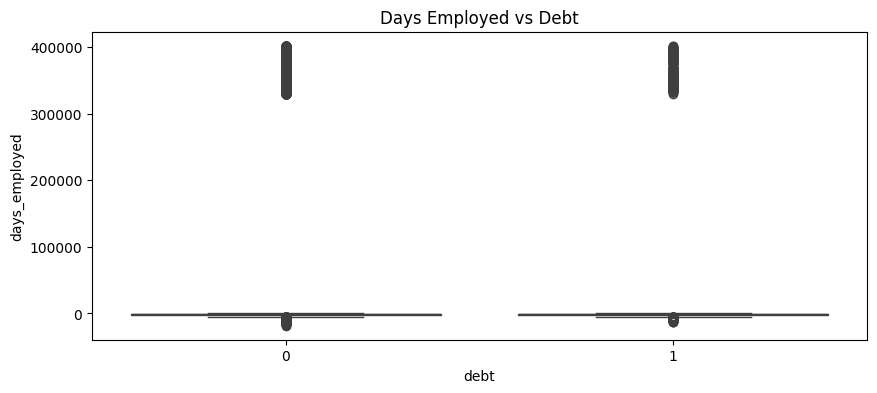

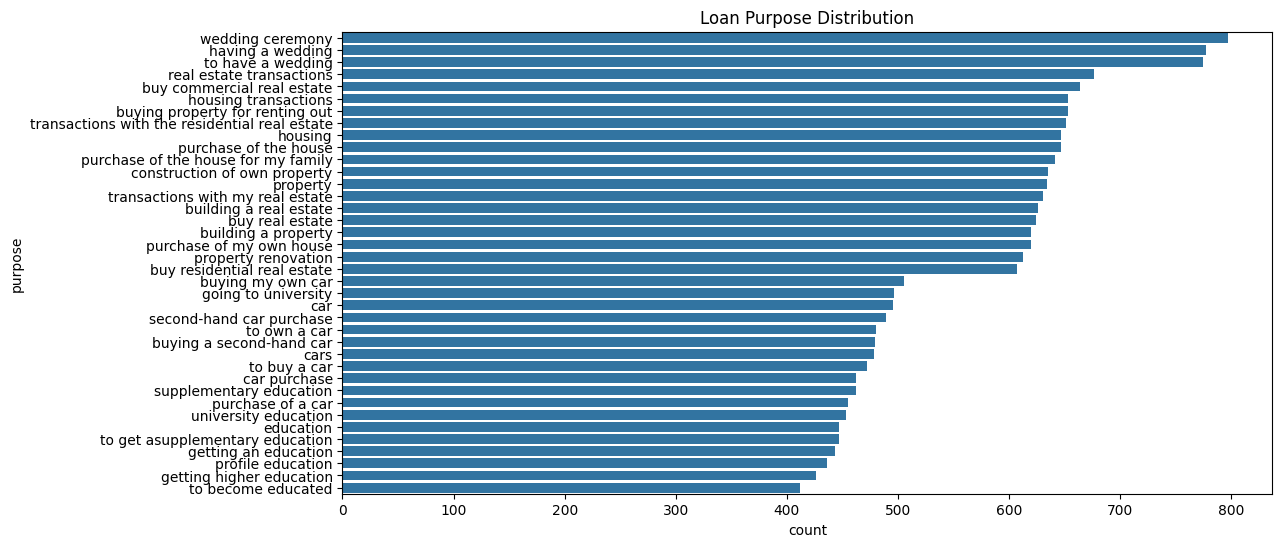

In [14]:
sns.countplot(x='debt', data=df)
plt.title('Debt Distribution')
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(df['total_income'], bins=40, kde=True)
plt.title('Total Income Distribution')
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x='debt', y='total_income', data=df)
plt.title('Income vs Debt')
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x='debt', y='days_employed', data=df)
plt.title('Days Employed vs Debt')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y='purpose', data=df, order=df['purpose'].value_counts().index)
plt.title('Loan Purpose Distribution')
plt.show()


In [15]:
df['education'] = df['education'].str.lower().str.strip()
df['gender'] = df['gender'].str.upper()

df = pd.get_dummies(df, columns=['education', 'family_status', 'gender', 'income_type', 'purpose'], drop_first=True)


<Axes: >

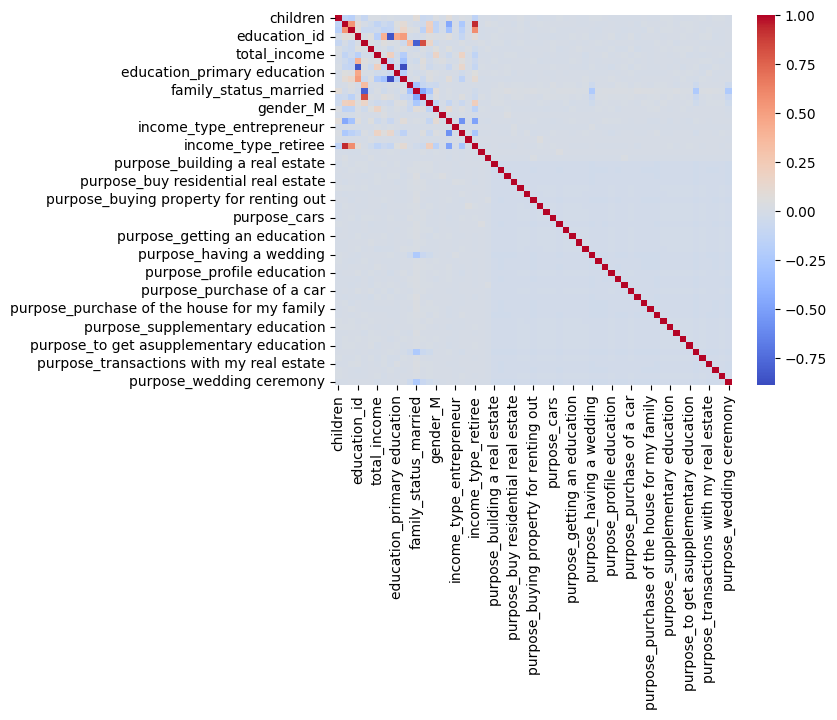

In [16]:
df.describe()
df.corr()['debt'].sort_values(ascending=False)
sns.heatmap(df.corr(), cmap='coolwarm')
